# CSI 5810 Project 2 - Text Mining

## Samantha Bracellari

-----

## OBJECTIVE 

1. Set up an arrangement to collect data, i.e. Twitter hashtags or product reviews. The collected tweets/reviews will constitute your data for mining.
2. Decide on your actual mining task. Examples of some tasks are:
  - Classify each tweet/blog post into favorable or unfavorable to the team and generate a chart showing daily/weekly score of favorable/unfavorable trend. 
  - You may want to cluster daily tweets/blogs to see the emergence of different subtopics in the tweets.
  - You may want to build a classifier that predicts the number of stars a review will receive

-----


### PART 1: INITIALIZATION

Import statements, variable declarations, etc.

In [1]:
# import libraries
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from wordcloud import WordCloud 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# read in the initial amazon review data
# formatting will be done in a later section
reviews = pd.read_csv('reviews.csv')

-----

### PART 2: DOMAIN UNDERSTANDING

**DATA CHARACTERISTICS**

Below are the features that are provided with each Amazon review

**Input variables**

1. Asin - Review ID (categorical)
2. UserName - The username of the reviewer (categorical)
3. Subject - the title of the review. (categorical)
4. Review - the content of the review. (categorical)

**Output variable**

1. Rating - the rating of the product, 1-5. (numeric)

-----

### PART 3: FEATURE SELECTION

For this particular type of model, all we care about is the review and the rating. All other columns may be removed.

-----

### PART 4: DATA CLEANSING

There are a few things that need to be done before the data can be used:

1. The 'Rating' column was cast from a string to an int.
    - EX: '5.0 stars out of 5' -> 5
2. Puncuation and emojis were removed from the 'Review' column
3. Stopwords were removed from the 'Review' column

In [2]:
# data cleansing/formatting
def cleanse_text(reviews):
    # cast 'Rating' column from string to int
    # EX: '5.0 out of 5 stars' -> 5
    reviews['Rating'] = reviews['Rating'].str[0].astype(int)

    # remove punctuation and emojis from the 'Review' column
    reviews['Review'] = reviews['Review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
    reviews['Review'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

    # convert all text to lower case
    reviews['Review'] = reviews['Review'].str.lower()

    # remove stopwords from 'Review' column
    stops = set(stopwords.words("english"))
    reviews['Review'].apply(lambda x: [item for item in x if item not in stops])
    # reviews['Review'] = np.array(reviews['Review'].str.split(' '))

cleanse_text(reviews)

-----

### PART 5: DATA VISUALIZATION

The only feature we can visualize with a histogram is the 'Rating' column, so lets look at that.

We will also look at four different wordclouds of the 'Review' feature:

1. An overall wordcloud
2. A positive wordcloud (where rating > 3)
3. A neutral wordcloud (where rating = 3)
4. A negative wordcloud (where rating < 3)

<AxesSubplot:>

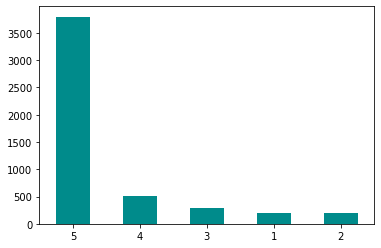

In [3]:
# look at the distribution of ratings
reviews['Rating'].value_counts(normalize=False).plot.bar(rot=0, color='darkcyan')

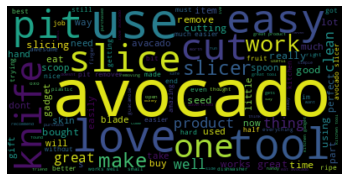

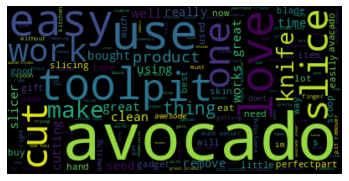

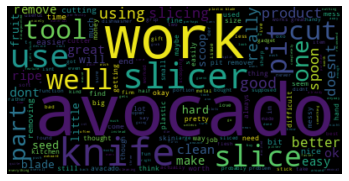

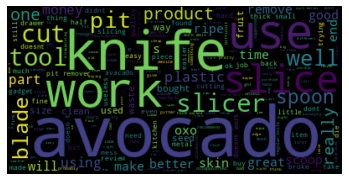

In [4]:
# overall wordcloud
overall = " ".join(review for review in reviews['Review'])
wordcloud = WordCloud().generate(overall)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# positive wordcloud
positive = reviews[reviews['Rating'] > 3]

p = " ".join(review for review in positive['Review'])
pwordcloud = WordCloud().generate(p)

plt.imshow(pwordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# neutral wordcloud
neutral = reviews[reviews['Rating'] == 3]

nn = " ".join(review for review in neutral['Review'])
nnwordcloud = WordCloud().generate(nn)

plt.imshow(nnwordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# negative wordcloud
negative = reviews[reviews['Rating'] < 3]

n = " ".join(review for review in negative['Review'])
nwordcloud = WordCloud().generate(n)

plt.imshow(nwordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


-----

### PART 6: VECTORIZATION

Let's quickly vectorize the 'Review' column and look at its term document matrix, where each review is considered a document.

In [6]:
# vectorize the 'Review' column for use in regression model
vec = CountVectorizer()

X = vec.fit_transform(reviews['Review'])

tdm = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(tdm.iloc[:, 200:250])

      affordable  aficionado  aficionados  afilado  afraid  after  afternoon  \
0              0           0            0        0       0      3          0   
1              0           0            0        0       0      0          0   
2              0           0            0        0       0      0          0   
3              0           0            0        0       0      0          0   
4              0           0            0        0       0      0          0   
...          ...         ...          ...      ...     ...    ...        ...   
4995           0           0            0        0       0      0          0   
4996           0           0            0        0       0      0          0   
4997           0           0            0        0       0      0          0   
4998           0           0            0        0       0      0          0   
4999           0           0            0        0       0      0          0   

      afterward  afterwards  afterwards

-----

### PART 7: PREDICTIVE MODEL

We'll begin by  splitting the data into testing and training sets

In [7]:
# accuracy report generation
def report(y_test, y_pred):
    print('\nCALCULATING SKLEARN ACCURACIES')
    print('\nACCURACY SCORE:', accuracy_score(y_test, y_pred))
    print('RECALL SCORE:', recall_score(y_test,y_pred, average='weighted'))
    print('\n')                    

# split data into train and test sets
# X is defined above
y = reviews['Rating'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**LOGISTIC REGRESSION**

A Logistic Regression model was chosen for this particular scenario. Train the model and provide results

PREDICTED RATINGS:
 [5 5 5 5 4 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 4 5 5 5 5 5 3
 5 5 5 5 5 4 1 5 5 5 5 5 5 5 5 5 5 3 5 5 4 5 5 5 1 5 4 5 5 5 5 5 5 5 4 4 4
 5 5 5 5 5 5 4 5 5 5 5 5 5 4 4 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 3 5 5 4 5 5 3 5
 5 5 5 5 5 5 5 2 5 3 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 4 5 5 5 5
 5 5 5 5 5 3 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 2 5 1 5 5
 5 5 5 5 4 5 5 4 5 5 5 5 4 5 5 1 5 5 5 5 5 5 5 5 3 5 5 5 1 5 3 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 1 4 4 5 4 5 3 5 5 5 5 5 5 5 4 3 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 1 4 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 1 5 5 5 5 5 5 3 5 5 1 5 5 5 5 5 5 4 5 5 5 5 5 5 5 2 5 5 5 1
 5 5 5 5 5 5 1 5 5 5 5 5 5 5 2 5 4 5 5 5 5 5 3 4 5 3 5 5 5 5 5 5 5 5 4 5 5
 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 2 5
 5 5 5 5 5 5 4 5 5 5 5 5 5 4 5 5 5 5 5 5 3 5 3 4 5 5 5 5 5 5 2 4 5 5 5 5 5
 5 5 

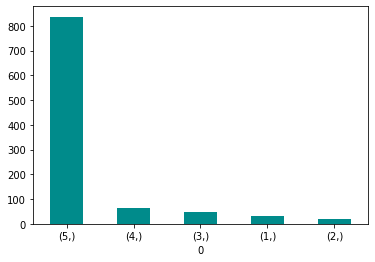

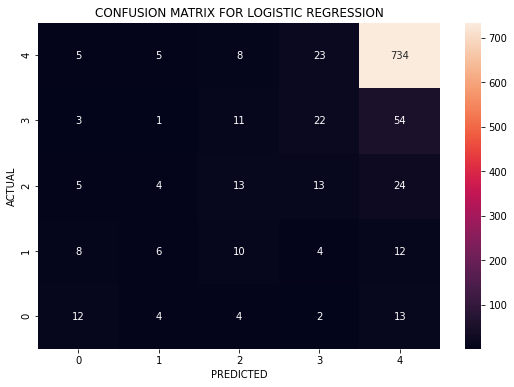

In [9]:
# train logistic model with training data
LR  = LogisticRegression().fit(X_train, y_train)

# predict target values
y_pred = LR.predict(X_test)
print('PREDICTED RATINGS:\n', y_pred)

# perform N-Fold Cross Validation
LR1 = LogisticRegression()
scores = cross_val_score(LR1, X, y, cv=10)
print('\nN-FOLD CROSS VALIDATION ACCURACY: ', scores.mean(), '+/-', scores.std())

pd.DataFrame(y_pred).value_counts(normalize=False).plot.bar(rot=0, color='darkcyan')

# calculate logistic regression score
print('\nSCORE:', LR.score(X_test, y_test))

# generate accuracy report
report(y_test, y_pred)

# generate a confusion matrix
cf = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (9,6))
ax = sn.heatmap(cf, annot=True, fmt='g')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.title('CONFUSION MATRIX FOR LOGISTIC REGRESSION')
ax.set_ylim(0, 5)
ax.set_xlim(0, 5)
plt.show()